In [3]:
import os
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm

# Function to compute optical flow and save the images
def compute_optical_flow(video_dir, output_dir, video_id):
    # Get all the image filenames in the video directory
    image_files = [f"{i:05d}.jpg" for i in range(1, 38)]  # Assuming 37 images per video
    
    # Read the first image to initialize the previous frame
    prev_image = cv2.imread(os.path.join(video_dir, image_files[0]), cv2.IMREAD_GRAYSCALE)

    for i in range(1, len(image_files)):
        # Read the next image
        next_image = cv2.imread(os.path.join(video_dir, image_files[i]), cv2.IMREAD_GRAYSCALE)
        
        # Compute optical flow using Farneback method
        flow = cv2.calcOpticalFlowFarneback(prev_image, next_image, None, 0.5, 3, 15, 3, 5, 1.2, 0)

        # Visualize the optical flow (magnitude and angle)
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])

        # Normalize magnitude to fit into the 0-255 range
        magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)

        # Convert to HSV to represent direction (angle) and magnitude (speed)
        hsv = np.zeros((flow.shape[0], flow.shape[1], 3), dtype=np.uint8)
        hsv[..., 1] = 255  # Saturation to full (white in hue angle)
        hsv[..., 0] = (angle * 180 / np.pi) / 2  # Hue: angle (0-180 range for color)
        hsv[..., 2] = magnitude  # Value: magnitude of flow

        # Convert to BGR format for visualization
        flow_bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

        # Save the optical flow image as a .png file
        output_image_path = os.path.join(output_dir, f"{video_id}_{i:05d}.png")
        cv2.imwrite(output_image_path, flow_bgr)

        # Update the previous image to the current one for the next iteration
        prev_image = next_image

# Function to process selected videos and generate optical flow images
def process_videos(input_dir, output_dir, metadata_file, num_labels=4, num_videos_per_label=2):
    # Read metadata from the Train.csv
    df = pd.read_csv(metadata_file)

    # Get 4 unique labels
    unique_labels = df['label'].unique()[:num_labels]

    for label in unique_labels:
        # Get video directories for each label, limit to 2 videos per label
        label_videos = df[df['label'] == label].sample(n=num_videos_per_label, random_state=42)['video_id'].unique()

        for video_id in tqdm(label_videos, desc=f"Processing label {label}"):
            video_dir = os.path.join(input_dir, str(video_id))  # Path to video frames
            if not os.path.exists(video_dir):
                print(f"Video directory {video_dir} does not exist.")
                continue
            
            # Create the output folder for this video if it doesn't exist
            label_output_dir = os.path.join(output_dir, str(video_id))
            os.makedirs(label_output_dir, exist_ok=True)
            
            # Compute and save optical flow for each video
            compute_optical_flow(video_dir, label_output_dir, video_id)

# Example usage
input_dir = "/Users/yashwanthchiluka/Downloads/Train 2"  # Path to your "Train" folder
output_dir = "/Users/yashwanthchiluka/Downloads/datat"     # Path to save output optical flow images
metadata_file = "/Users/yashwanthchiluka/Downloads/Train.csv"  # Path to your metadata CSV file

# Call the function to process the videos (4 unique labels, 2 videos per label)
process_videos(input_dir, output_dir, metadata_file, num_labels=4, num_videos_per_label=2)



Processing label Sliding Two Fingers Down: 100%|██| 2/2 [00:00<00:00, 17.54it/s]


Loading data for label Doing other things: 100%|██| 2/2 [00:00<00:00, 72.03it/s]
Loading data for label Pushing Two Fingers Away: 100%|█| 2/2 [00:00<00:00, 118.8
Loading data for label Drumming Fingers: 100%|███| 2/2 [00:00<00:00, 149.91it/s]
Loading data for label Sliding Two Fingers Down: 100%|█| 2/2 [00:00<00:00, 85.66

Epoch 1/10



/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.3300 - loss: 1.3654 - val_accuracy: 0.4028 - val_loss: 1.2750
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.3652 - loss: 1.2634 - val_accuracy: 0.4861 - val_loss: 1.1813
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4803 - loss: 1.1921 - val_accuracy: 0.5903 - val_loss: 1.0760
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5632 - loss: 1.0501 - val_accuracy: 0.6042 - val_loss: 1.0188
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4871 - loss: 1.0484 - val_accuracy: 0.6042 - val_loss: 1.0425
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4713 - loss: 1.1006 - val_accuracy: 0.5972 - val_loss: 0.9961
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5893 - loss: 0.9633 - val_accuracy: 0.5972 - val_loss: 0.9797
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6743 - loss: 0.9627 - val_accuracy: 0.6111 - val_loss: 0.9383
Epoch 9/10


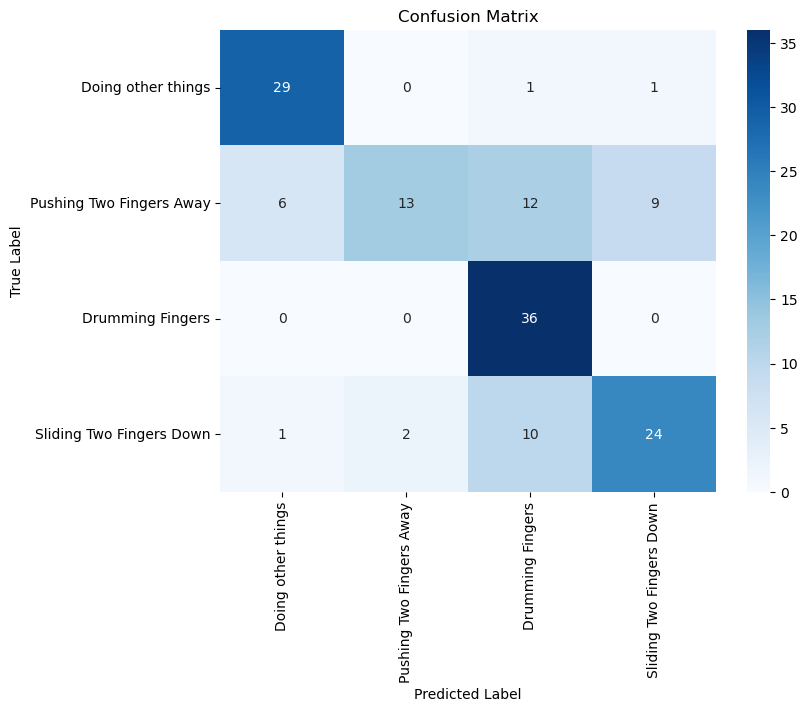

In [13]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

# Function to load optical flow images and labels from the output folder
def load_optical_flow_data(output_dir, metadata_file, num_labels=4, num_videos_per_label=2):
    # Read metadata from the Train.csv
    df = pd.read_csv(metadata_file)

    # Get 4 unique labels
    unique_labels = df['label'].unique()[:num_labels]
    
    images = []
    labels = []
    label_map = {label: idx for idx, label in enumerate(unique_labels)}  # Map labels to integers
    
    # Iterate through each label
    for label in unique_labels:
        # Get video directories for each label, limit to 2 videos per label for training
        label_videos = df[df['label'] == label].sample(n=num_videos_per_label, random_state=42)['video_id'].unique()

        for video_id in tqdm(label_videos, desc=f"Loading data for label {label}"):
            video_dir = os.path.join(output_dir, str(video_id))  # Path to video optical flow images
            if not os.path.exists(video_dir):
                print(f"Video directory {video_dir} does not exist.")
                continue
            
            # Load each optical flow image for this video
            for i in range(1, 38):  # Assuming 37 images per video
                image_path = os.path.join(video_dir, f"{video_id}_{i:05d}.png")
                if os.path.exists(image_path):
                    img = cv2.imread(image_path)
                    img = cv2.resize(img, (128, 128))  # Resize to 128x128 for CNN input
                    images.append(img)
                    labels.append(label_map[label])  # Convert label to integer
    
    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)
    
    # Normalize the images
    images = images.astype('float32') / 255.0
    
    return images, labels, label_map, unique_labels

# Function to build the CNN model for classification
def build_cnn_model(input_shape=(128, 128, 3), num_classes=4):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # softmax for multi-class classification
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Function to process and train the model
def train_and_test_model(output_dir, metadata_file, num_labels=4, num_videos_per_label=2):
    # Load the optical flow data
    images, labels, label_map, unique_labels = load_optical_flow_data(output_dir, metadata_file, num_labels, num_videos_per_label)
    
    # Split the dataset into training and testing data (50% for testing)
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.5, random_state=42)

    # Build the CNN model
    model = build_cnn_model()

    # Image Augmentation (optional)
    datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                                 shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

    # Train the model
    model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    
    # Predict the labels on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with the highest probability
    
    # Filter predictions and true labels to only include the selected 4 labels
    filter_indices = np.isin(y_test, range(num_labels))  # Filter for only the 4 chosen labels
    y_test_filtered = y_test[filter_indices]
    y_pred_filtered = y_pred_classes[filter_indices]

    # Generate confusion matrix for the filtered data
    cm = confusion_matrix(y_test_filtered, y_pred_filtered)
    plot_confusion_matrix(cm, unique_labels)

    return model

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
output_dir = "/Users/yashwanthchiluka/Downloads/datat"  # Path to your output folder containing optical flow images
metadata_file = "/Users/yashwanthchiluka/Downloads/Train.csv"  # Path to your metadata CSV file

# Train and test the model
trained_model = train_and_test_model(output_dir, metadata_file, num_labels=4, num_videos_per_label=2)


In [10]:
pip install pandas pillow numpy tqdm


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opencv-python numpy


Note: you may need to restart the kernel to use updated packages.
